# 金庸的武侠世界

金庸老爷子一共写了15部武侠小说，它们分别是：

- 《飞狐外传》（1960年）
- 《雪山飞狐》（1959年）
- 《连城诀》（1963年）
- 《天龙八部》（1963年）
- 《射雕英雄传》（1957年）
- 《白马啸西风》（1961年）
- 《鹿鼎记》（1969年）
- 《笑傲江湖》（1967年）
- 《书剑恩仇录》（1955年）
- 《神雕侠侣》（1959年）
- 《侠客行》（1965年）
- 《倚天屠龙记》（1961年）
- 《碧血剑》（1956年）
- 《鸳鸯刀》（1961年）
- 《越女剑》（1970年）

我们现在就用 `Python` 来探索一下金庸小说中的武侠世界吧。

## 准备工作

再处理小说之前，我们需要先做一些准备工作。

因为涉及中文字符，所以我们使用 `__future__` 中 Python 3 的特性，将所有的字符串转为 `unicode`。

In [1]:
from __future__ import unicode_literals

再来我们解决图像里中文字符显示的问题，Matplotlib虽然支持 `unicode` 编码，但是直接输出中文字体会出现问题。

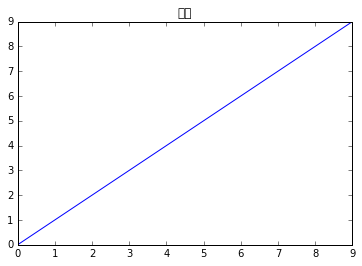

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

x = range(10)
plt.plot(x)
plt.title("中文")
plt.show()

出现上图的原因是它找不到合适的中文字体去显示中文，为此，我们可以去寻找一些支持中文的字体来进行设置。

`Windows 7` 及以上的系统中，字体位置为 `C:/Windows/Fonts`，例如：
- 宋体：`C:/Windows/Fonts/simsun.ttc`

`Linux` 系统可以通过 `fc-list` 命令查看已有的字体和相应的位置，例如：
- `/usr/share/fonts/truetype/osx-font-family/Songti.ttc: Songti TC,宋體\-繁,宋体\-繁:style=Bold,粗體,粗体`
- `/usr/share/fonts/truetype/osx-font-family/Devanagari Sangam MN.ttc: Devanagari Sangam MN,देवनागरी संगम एम॰एन॰:style=Bold,粗體,Fed,Fett,Puolilihava,Gras,Grassetto,ボールド,볼드체,Vet,Fet,Negrito,Жирный,बोल्ड,粗体,Negrita`
- `/usr/share/fonts/truetype/osx-font-family/Iowan Old Style.ttc: Iowan Old Style,Iowan Old Style Black:style=Black Italic,Italic`

也可以从网上直接下载字体
- 比如 `Yahei Consolas` 的字体 `YaHei.Consolas.1.11b.ttf`。

找到了字体的位置，我们可以使用 `matplotlib.font_manager` 中的 `FontProperties` 导入字体：

    font_xxx = FontProperties(fname="/usr/share/fonts/truetype/osx-font-family/Songti.ttc")
    font_xxx = FontProperties(fname="C://Windows//Fonts//simsun.ttc")

为了方便，我们不使用字体的绝对路径导入，而是将需要的字体放在程序对应的文件夹下：

- `simsum.ttc`
- `YaHei.Consolas.1.11b.ttf`

In [3]:
from matplotlib.font_manager import FontProperties

font_simsum = FontProperties(fname="simsun.ttc")
font_yahei_consolas = FontProperties(fname="YaHei.Consolas.1.11b.ttf")

在绘图的时候进行设置：

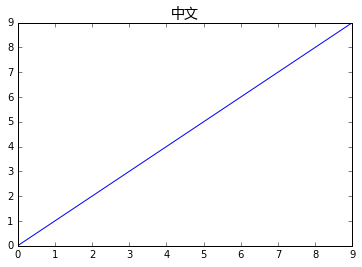

In [4]:
x = range(10)
plt.plot(x)
plt.title("中文", fontproperties=font_yahei_consolas, fontsize=14)
plt.show()

## 小说概览

我们从网上找到金庸小说的 txt 全文，放在 `novels` 文件夹中：

In [5]:
!ls novels

书剑恩仇录.txt	天龙八部.txt	碧血剑.txt    越女剑.txt    飞狐外传.txt
侠客行.txt	射雕英雄传.txt	神雕侠侣.txt  连城诀.txt    鸳鸯刀.txt
倚天屠龙记.txt	白马啸西风.txt	笑傲江湖.txt  雪山飞狐.txt  鹿鼎记.txt


先一睹为快：

In [6]:
with open('novels/鸳鸯刀.txt') as f:
    # 去掉结尾的换行符
    data = [line.strip().decode('utf8') for line in f.readlines()]

for line in data[:13]:
    if line.strip():
        print line

﻿
　　鸳鸯刀
　　四个劲装结束的汉子并肩而立，拦在当路！
　　若是黑道上山寨的强人，不会只有四个，莫非在这黑沉沉的松林之中，暗中还埋伏下大批人手？如是剪径的小贼，见了这么声势浩大的镖队，远避之唯恐不及，哪敢这般大模大样的拦路挡道？难道竟是武林高手，冲着自己而来？
　　凝神打量四人：最左一人短小精悍，下巴尖削，手中拿着一对峨嵋钢刺。第二个又高又肥，便如是一座铁塔摆在地下，身前放着一块大石碑，碑上写的是“先考黄府君诚本之墓”，这自是一块墓碑了，不知放在身前有何用意？黄诚本？没听说江湖上有这么一位前辈高手啊！第三个中等身材，白净脸皮，若不是一副牙齿向外凸出了一寸，一个鼻头低陷了半寸，倒算得上是一位相貌英俊的人物，他手中拿的是一对流星锤。最右边的是个病夫模样的中年人，衣衫褴褛，咬着一根旱烟管，双目似睁似闭，嘴里慢慢喷着烟雾，竟是没将这一队七十来人的镖队瞧在眼里。
　　那三人倒还罢了，这病夫定是个内功深湛的劲敌。顷刻之间，江湖上许多轶闻往事涌上了心头：一个白发婆婆空手杀死了五名镖头，劫走了一支大镖；一个老乞丐大闹太原府公堂，割去了知府的首级，倏然间不知去向；一个美貌大姑娘打倒了晋北大同府享名二十余年的张大拳师……越是貌不惊人、满不在乎的人物，越是武功了得，江湖上有言道：“真人不露相，露相不真人。”
　　瞧着这个闭目抽烟的病夫，陕西西安府威信镖局的总镖头、“铁鞭镇八方”周威信不由得深自踌躇起来，不由自主的伸手去摸了一摸背上的包袱。


## 出场人物

接着，我们先找到金庸小说中所有出场的人物，放到 names.txt 文件中，其格式为：

```
小说1
人物1 人物2 ……
小说2
人物1 人物2 ……
小说3
人物1 人物2 ……
……
```

In [7]:
with open('names.txt') as f:
    # 去掉结尾的换行符
    data = [line.strip().decode('utf8') for line in f.readlines()]

novels = data[::2]
names = data[1::2]

novel_names = {k: v.split() for k, v in zip(novels, names)}

for name in novel_names['天龙八部'][:20]:
    print name

刀白凤
丁春秋
马夫人
马五德
小翠
于光豪
巴天石
不平道人
邓百川
风波恶
甘宝宝
公冶乾
木婉清
包不同
天狼子
太皇太后
王语嫣
乌老大
无崖子
云岛主


## 寻找主角光环

我们来看看人物在小说中的出场次数统计。

显然出场次数越多，自然主角光环越强，我们定义一个函数寻找小说中主角光环最强的几个人：

In [8]:
def find_main_charecters(novel, num=10):
    with open('novels/{}.txt'.format(novel)) as f:
        data = f.read().decode('utf8')
    count = []
    for name in novel_names[novel]:
        count.append([name, data.count(name)])
    count.sort(key=lambda x: x[1])
    _, ax = plt.subplots()
    
    numbers = [x[1] for x in count[-num:]]
    names = [x[0] for x in count[-num:]]
    ax.barh(range(num), numbers, color='red', align='center')
    ax.set_title(novel, fontsize=14, fontproperties=font_yahei_consolas)
    ax.set_yticks(range(num))
    ax.set_yticklabels(names, fontsize=14, fontproperties=font_yahei_consolas)

天龙八部：

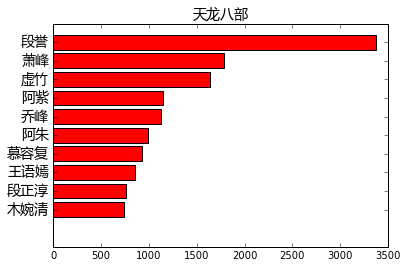

In [9]:
find_main_charecters("天龙八部")

显然，就《天龙八部》来说，萧（乔）峰，段誉，虚竹这三兄弟的主角光环最强。

再看射雕三部曲：

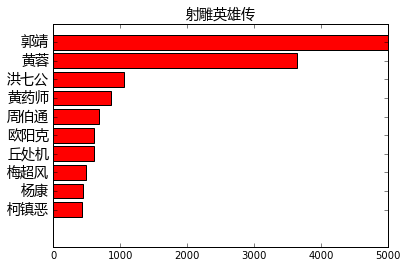

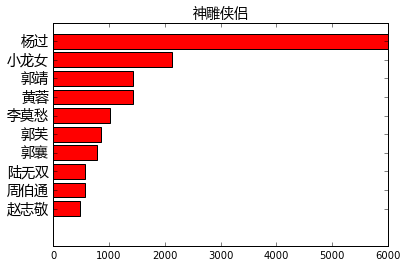

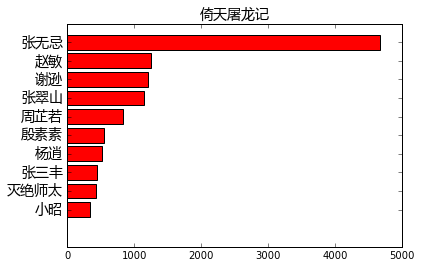

In [10]:
find_main_charecters("射雕英雄传")
find_main_charecters("神雕侠侣")
find_main_charecters("倚天屠龙记")

## Word2Vec

接下来，我们将使用一些机器学习的观点来处理这些小说。

`Word2Vec` 是一款将词表征为实数值向量的高效工具，原理就不过多介绍了，感兴趣的可以自行搜索，

`gensim` 包提供了一个 `Python` 版的实现。

- 源代码地址：https://github.com/RaRe-Technologies/gensim
- 官方文档地址：http://radimrehurek.com/gensim/

首先安装 `gensim`：

    pip install gensim
    
安装完成之后，导入这个包：

In [11]:
import gensim

Using gpu device 1: Tesla C2075 (CNMeM is disabled, CuDNN not available)


## 中文分词

虽然我们安装了 `gensim`，但我们还不可以直接使用它来进行 `Word2Vec` 的操作，因为 `Word2Vec` 中的词默认是用空格分隔的，而中文小说显然不符合这个要求，为此，我们需要对中文进行分词。

一个比较好用的 `Python` 中文分词包叫做 `jieba` （结巴）。

- 源代码地址：https://github.com/fxsjy/jieba

安装 jieba：
    
    pip install jieba
    
导入：

In [12]:
import jieba

`jieba` 包具有识别新词的能力，不过为了得到更准确的分词结果，我们可以将人名导入 `jieba` 库的字典，除此之外，我们还加入门派和武功的专有名词：

In [13]:
for _, names in novel_names.iteritems():
    for name in names:
        jieba.add_word(name)
        
with open("kungfu.txt") as f:
    kungfu_names = [line.decode('utf8').strip() for line in f.readlines()]
    
with open("bangs.txt") as f:
    bang_names = [line.decode('utf8').strip() for line in f.readlines()]

for name in kungfu_names:
    jieba.add_word(name)

for name in bang_names:
    jieba.add_word(name)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.cache
Loading model cost 0.370 seconds.
DEBUG:jieba:Loading model cost 0.370 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


我们按照段落处理文本：

In [14]:
novels = ["书剑恩仇录", 
          "天龙八部",
          "碧血剑",
          "越女剑",
          "飞狐外传",
          "侠客行",
          "射雕英雄传",
          "神雕侠侣",
          "连城诀",
          "鸳鸯刀",
          "倚天屠龙记",
          "白马啸西风",
          "笑傲江湖",
          "雪山飞狐",
          "鹿鼎记"]

sentences = []

for novel in novels:
    print "处理：{}".format(novel)
    with open('novels/{}.txt'.format(novel)) as f:
        data = [line.decode('utf8').strip() for line in f.readlines() if line.decode('utf8').strip()]
    for line in data:
        words = list(jieba.cut(line))
        sentences.append(words)

处理：书剑恩仇录
处理：天龙八部
处理：碧血剑
处理：越女剑
处理：飞狐外传
处理：侠客行
处理：射雕英雄传
处理：神雕侠侣
处理：连城诀
处理：鸳鸯刀
处理：倚天屠龙记
处理：白马啸西风
处理：笑傲江湖
处理：雪山飞狐
处理：鹿鼎记


## 训练模型

默认参数进行训练：

In [15]:
model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

我们可以把训练好的模型存到本地：

In [16]:
model.save("louis_cha.model")

从本地磁盘上读取模型：

In [17]:
model = gensim.models.Word2Vec.load("louis_cha.model")

## 相似度结果

有了模型，我们可以进行一些简单而有趣的测试。

首先看与乔峰相似的人：

In [18]:
for k, s in model.most_similar(positive=["乔峰", "萧峰"]):
    print k, s

段正淳 0.839533925056
慕容复 0.800726354122
虚竹 0.796926677227
童姥 0.791711509228
谢烟客 0.787050366402
游坦之 0.786818385124
余鱼同 0.780444204807
袁承志 0.779631733894
钟万仇 0.759801149368
贝海石 0.756160736084


出来的都是出场较多的男性人物。

再看看与阿朱相似的人：

In [19]:
for k, s in model.most_similar(positive=["阿朱"]):
    print k, s

钟灵 0.789930582047
阿紫 0.77720785141
方怡 0.774438858032
钟夫人 0.767169654369
香香公主 0.763835728168
王语嫣 0.761606991291
青青 0.761157155037
仪琳 0.75483584404
木婉清 0.751208424568
段誉 0.745343744755


这回出现的是一群女性角色。

除了人物，我们可以看看门派：

In [20]:
for k, s in model.most_similar(positive=["丐帮"]):
    print k, s

长乐帮 0.807791054249
雪山派 0.793763160706
峨嵋派 0.792181968689
天地会 0.789434850216
门人 0.785883545876
红花会 0.78480899334
恒山派 0.779587745667
嵩山派 0.77581256628
全真教 0.763592064381
魔教 0.746910750866


这个出来的结果就是一堆门派。

还可以看看武功秘籍：

In [21]:
for k, s in model.most_similar(positive=["降龙十八掌"]):
    print k, s

打狗棒法 0.89123404026
空明拳 0.890258312225
太极拳 0.884406626225
一阳指 0.874251723289
心法 0.874069094658
八卦掌 0.864349603653
绝招 0.864094853401
乾坤大挪移 0.858512759209
六合拳 0.852675139904
拳法 0.848574995995


在 Word2Vec 的模型里，有过“中国-北京=法国-巴黎”的例子，这里我们也可以找到这样的例子：

In [22]:
def find_relationship(a, b, c):
    """
    返回 d
    a与b的关系，跟c与d的关系一样
    """
    d, _ = model.most_similar(positive=[c, b], negative=[a])[0]
    print "给定“{}”与“{}”，“{}”和“{}”有类似的关系".format(a, b, c, d)

find_relationship("段誉", "段公子", "乔峰")

给定“段誉”与“段公子”，“乔峰”和“乔帮主”有类似的关系


类似的：

In [23]:
# 情侣对
find_relationship("郭靖", "黄蓉", "杨过")

# 岳父女婿
find_relationship("令狐冲", "任我行", "郭靖")

# 非情侣
find_relationship("郭靖", "华筝", "杨过")

给定“郭靖”与“黄蓉”，“杨过”和“小龙女”有类似的关系
给定“令狐冲”与“任我行”，“郭靖”和“黄药师”有类似的关系
给定“郭靖”与“华筝”，“杨过”和“绿萼”有类似的关系


以及，小宝你是有多爱男人：

In [24]:
# 韦小宝
find_relationship("杨过", "小龙女", "韦小宝")
find_relationship("令狐冲", "盈盈", "韦小宝")
find_relationship("张无忌", "赵敏", "韦小宝")

给定“杨过”与“小龙女”，“韦小宝”和“康熙”有类似的关系
给定“令狐冲”与“盈盈”，“韦小宝”和“康熙”有类似的关系
给定“张无忌”与“赵敏”，“韦小宝”和“康熙”有类似的关系


除了人物之间的关系，门派武功之间的关系：

In [25]:
find_relationship("郭靖", "降龙十八掌", "黄蓉")
find_relationship("武当", "张三丰", "少林")
find_relationship("任我行", "魔教", "令狐冲")

给定“郭靖”与“降龙十八掌”，“黄蓉”和“打狗棒法”有类似的关系
给定“武当”与“张三丰”，“少林”和“灭绝师太”有类似的关系
给定“任我行”与“魔教”，“令狐冲”和“恒山派”有类似的关系


## 人物聚类分析

之前我们对文本进行 `Word2Vec` 的结果，是将一个中文词组，映射到了一个向量空间，因此，我们可以利用这个向量表示的空间，对这些词进行聚类分析。

因为全部小说中的人物太多，我们考虑从单本小说进行入手：

In [26]:
all_names = []
word_vectors = None

for name in novel_names["天龙八部"]:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

### KMeans

聚类我们可以使用很多方法，这里我们用 scikit-learn 自带的几种聚类方法进行聚类。

先考虑 Kmeans：

In [27]:
from sklearn.cluster import KMeans

如果只分成3类，那么很明显地可以将众人分成主角，配角，跑龙套的三类：

In [28]:
N = 3
label = KMeans(N).fit(word_vectors).labels_

for c in range(N):
    print "\n类别{}：".format(c+1)
    for idx, name in enumerate(all_names[label==c]):
        print name,
        if idx % 10 == 9:
            print 
    print


类别1：
刀白凤 丁春秋 马夫人 巴天石 邓百川 风波恶 公冶乾 包不同 乌老大 云中鹤
白世镜 本因 过彦之 司马林 玄慈 玄寂 玄难 叶二娘 左子穆 李秋水
全冠清 阮星竹 朱丹臣 阿碧 波罗星 鸠摩智 耶律洪基 苏星河 段延庆 范骅
赵钱孙 哲罗星 钟万仇 秦红棉 徐长老 崔百泉 萧远山 褚万里 慕容博 谭婆
薛慕华

类别2：
马五德 小翠 不平道人 甘宝宝 天狼子 太皇太后 无崖子 止清 天山童姥 本参
本观 本相 出尘子 冯阿三 古笃诚 兰剑 平婆婆 石嫂 司空玄 玄苦
玄生 玄痛 耶律莫哥 李春来 李傀儡 刘竹庄 朴者和尚 许卓诚 竹剑 阿洪
阿胜 陈孤雁 来福儿 努儿海 宋长老 苏辙 吴长风 辛双清 严妈妈 余婆婆
岳老三 张全祥 单伯山 单季山 单小山 单正 段正明 宗赞王子 苟读 华赫艮
郁光标 卓不凡 范百龄 哈大霸 吴光胜 梦姑 神山上人 神音 室里 姚伯当
幽草 龚光杰 贾老者 康广陵 容子矩 桑土公 唐光雄 奚长老 诸保昆 崔绿华
符敏仪 菊剑 梅剑 游骥 游驹 傅思归 葛光佩 缘根 鲍千灵 智光大师
瑞婆婆 端木元 黎夫人 谭公 赫连铁树 谭青 摘星子 慧方 慧观 慧净
慧真 穆贵妃 吴领军 易大彪

类别3：
木婉清 王语嫣 乔峰 萧峰 阿朱 阿紫 段誉 段正淳 钟灵 虚竹
游坦之 慕容复


我们把众龙套去掉：

In [29]:
N = 4
c = sp.stats.mode(label).mode
remain_names = all_names[label!=c]
remain_vectors = word_vectors[label!=c]

remain_label = KMeans(N).fit(remain_vectors).labels_

for c in range(N):
    print "\n类别{}：".format(c+1)
    for idx, name in enumerate(remain_names[remain_label==c]):
        print name,
        if idx % 10 == 9:
            print 
    print


类别1：
刀白凤 马夫人 风波恶 包不同 乌老大 白世镜 司马林 叶二娘 左子穆 李秋水
阮星竹 阿碧 苏星河 赵钱孙 钟万仇 秦红棉 崔百泉 萧远山 慕容博 谭婆
薛慕华

类别2：
木婉清 王语嫣 阿朱 阿紫 段誉 钟灵 虚竹

类别3：
丁春秋 云中鹤 乔峰 萧峰 鸠摩智 段延庆 段正淳 游坦之 慕容复

类别4：
巴天石 邓百川 公冶乾 本因 过彦之 玄慈 玄寂 玄难 全冠清 朱丹臣
波罗星 耶律洪基 范骅 哲罗星 徐长老 褚万里


可以看到，段家的儿子和女儿倾向于聚在一起，而反派角色则倾向于被聚在一起。

### 层级聚类

换一本小说：

In [30]:
all_names = []
word_vectors = None

for name in novel_names["倚天屠龙记"]:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

这次采用层级聚类的方式，调用的是 `Scipy` 中层级聚类的包：

In [31]:
import scipy.cluster.hierarchy as sch

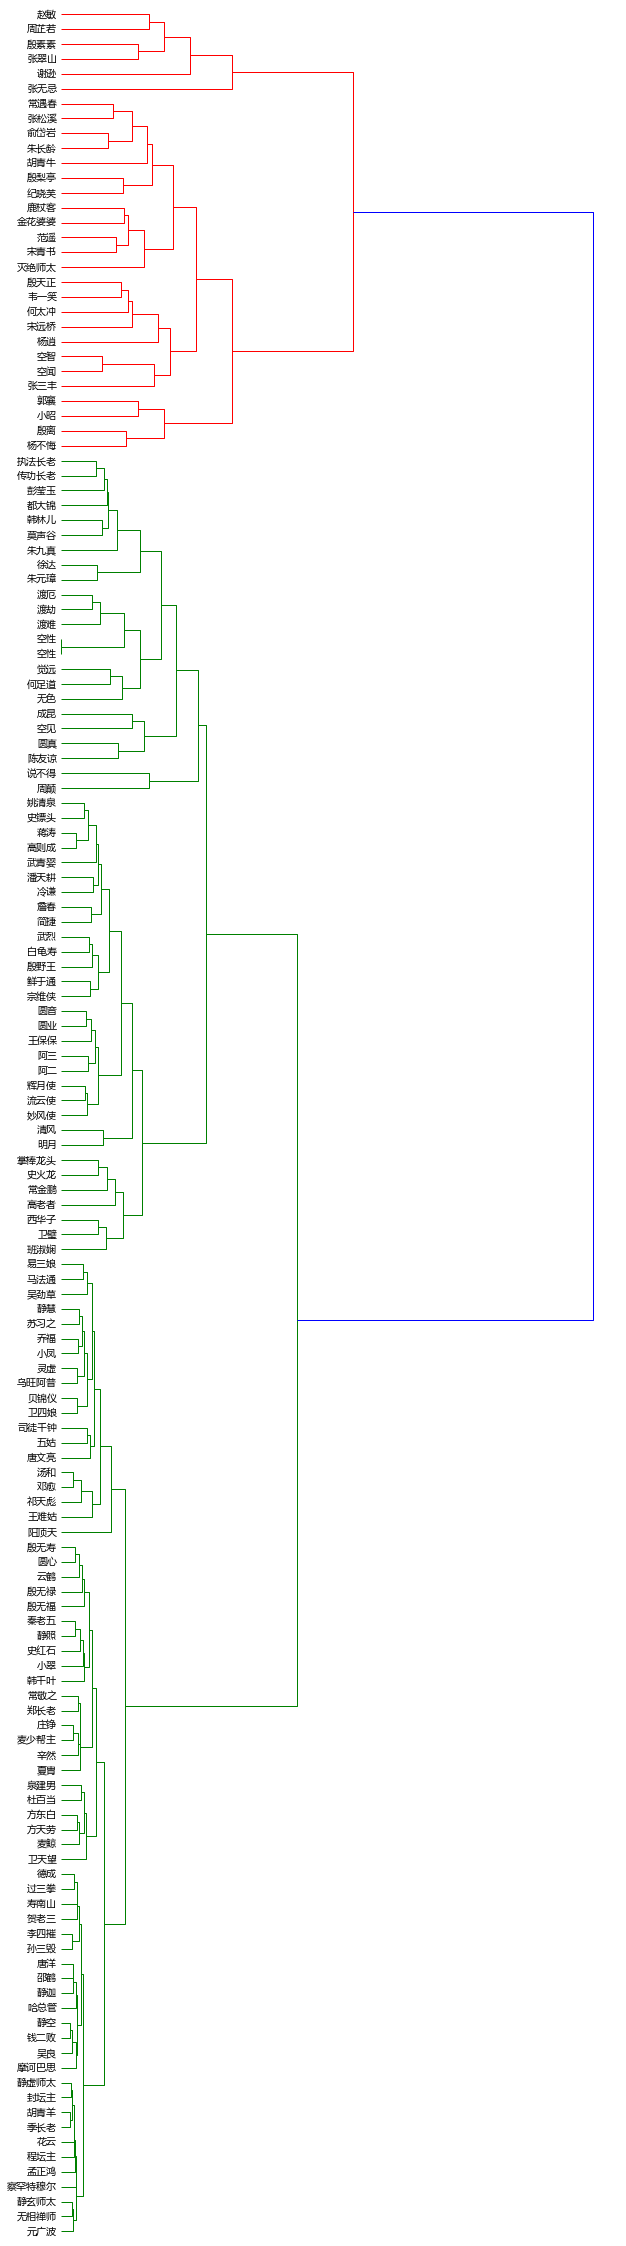

In [32]:
Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 40))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], fontproperties=font_yahei_consolas)
ax.set_frame_on(False)

plt.show()

来看红色聚类区的上半部分：

与张教主相关的人物：两个女人，赵敏和周芷若；父母和义父。

而红色聚类区的下半部分主要是明教与武当中与张无忌相关的部分。

### 门派和武功

除了人物，我们还可以考虑对武功进行聚类分析：

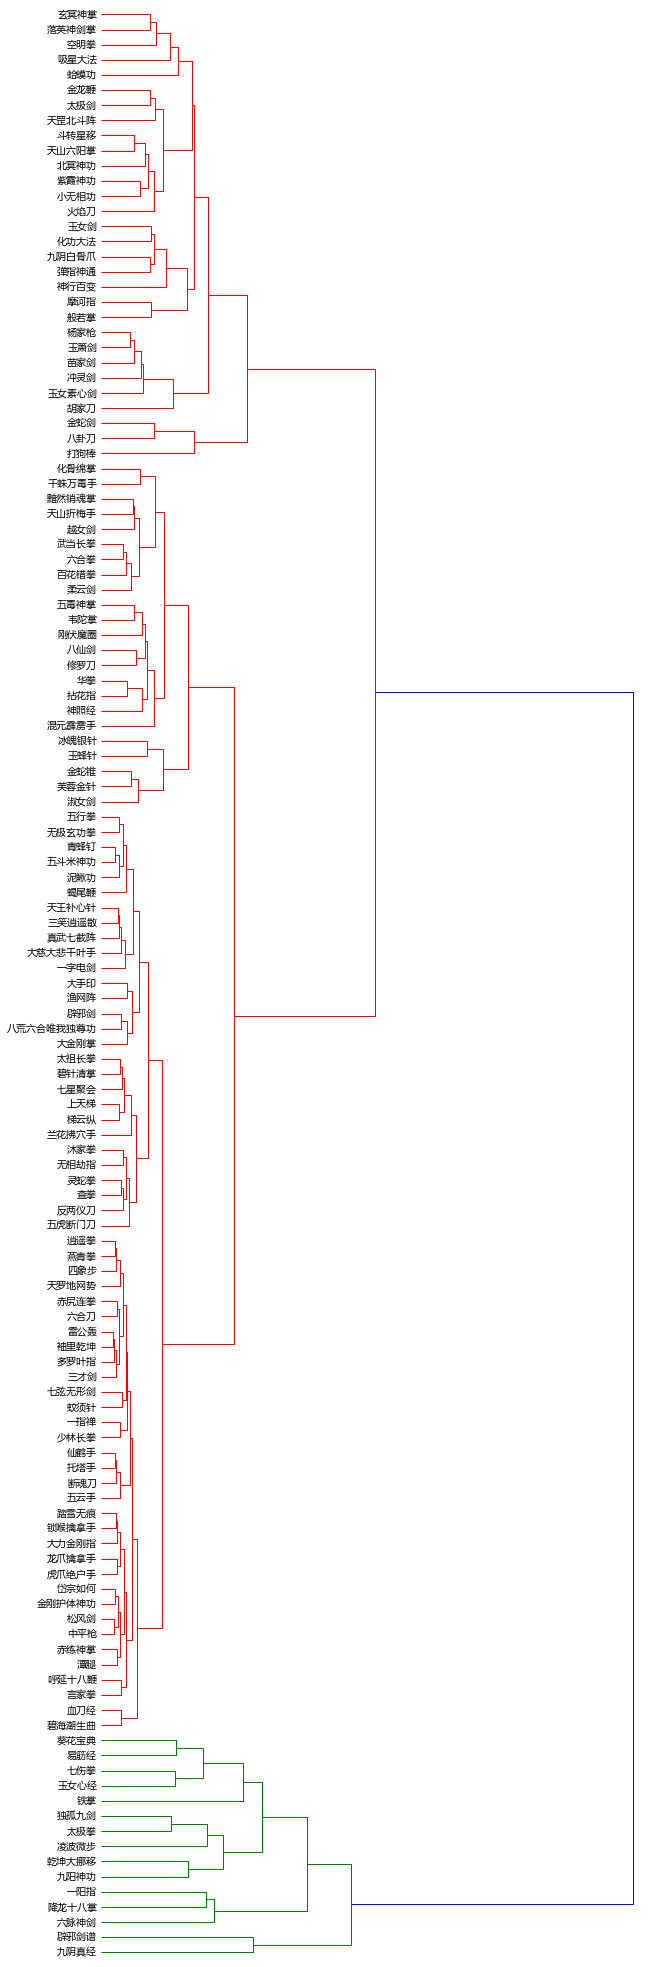

In [33]:
all_names = []
word_vectors = None
for name in kungfu_names:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 35))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], fontproperties=font_yahei_consolas)
ax.set_frame_on(False)

plt.show()

可以认为，一部分是主角比较厉害的武功，比较多的那部分只能算是配角们的武功。

再来就是门派的聚类：

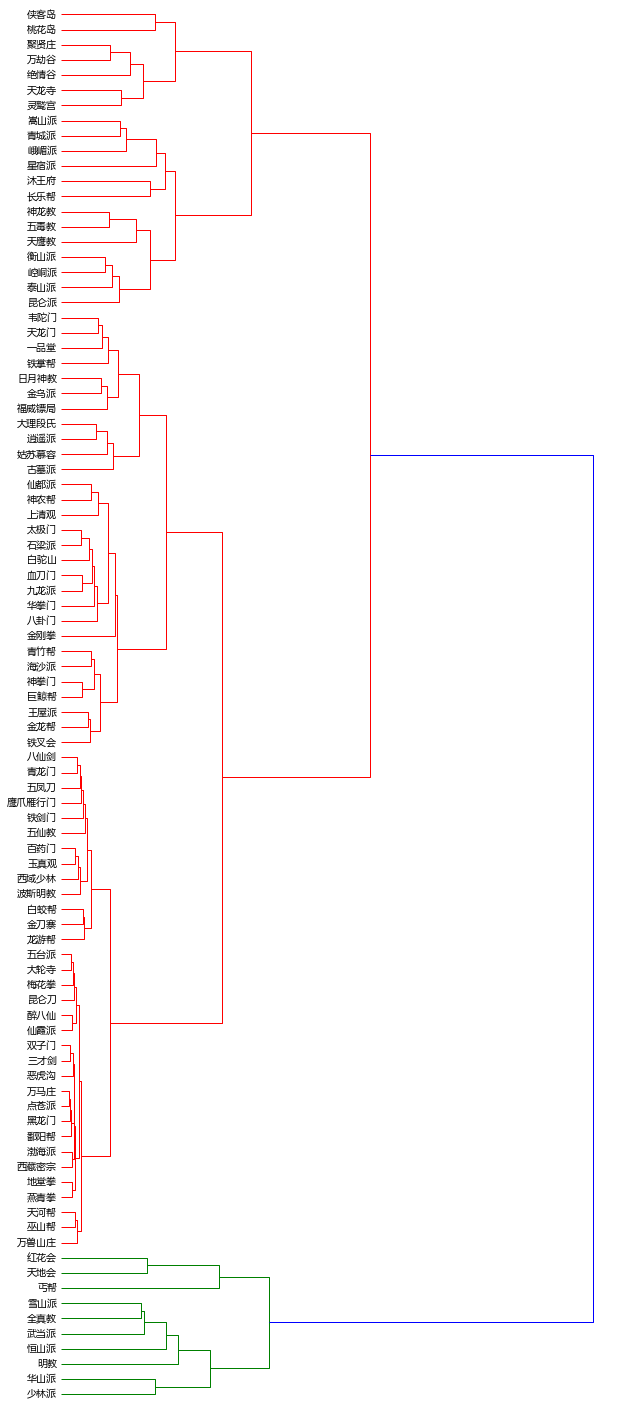

In [34]:
all_names = []
word_vectors = None
for name in bang_names:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 25))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], fontproperties=font_yahei_consolas)
ax.set_frame_on(False)

plt.show()

比较少的这一类，基本都是在某几部小说中出现的主要门派，而大多数门派都是打酱油的。

## 总结

> 飞雪连天射白鹿，笑书神侠倚碧鸳。

<p align=center><img src="http://d.hiphotos.baidu.com/baike/pic/item/cf1b9d16fdfaaf5120f00f5c8e5494eef11f7ac6.jpg", width='30%'></p>